# 1. Import Library, Setup Data, dan Melatih Model Data

In [ ]:
# Import Library dan Persiapan
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!pip install split-folders
import splitfolders
import itertools
import zipfile,os
import cv2

from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

# Penggunaan dataset sesuai kriteria
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

# Train Set dan Validasi Set
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

data_dir = '/tmp/rockpaperscissors/'
training_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

os.listdir('/tmp/rockpaperscissors/rps-cv-images')

# Ukuran validasi set harus 40% dari total dataset dan Penggunaan Image data generator
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range= 0.25,
                    fill_mode = 'nearest',
                    validation_split=0.4)
# Augmentasi Gambar 
train_generator = datagen.flow_from_directory(
        base_dir,  
        target_size=(100, 100), 
        batch_size=32,
        class_mode='categorical',
        subset='training',
        shuffle=True)
 
validation_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(100, 100),
        batch_size=32, 
        shuffle=True,
        class_mode='categorical',
        subset='validation')

# Melatih model Convolutional Network
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(100, 100, 3)),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

# Menyusun Model 
model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=32,  
      epochs=25, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2)

# Evaluasi Model
Accuration_tr = model.evaluate(train_generator)
Accuration_va = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(Accuration_tr[0]),'Accuracy: {:.4f}'.format(Accuration_tr[1]))
print('Loss: {:.4f}'.format(Accuration_va[0]),'Accuracy: {:.4f}'.format(Accuration_va[1]))

models = "tf_summary_models"
tf.saved_model.save(model, models)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 23, 23, 32)        0         
____________________________________

# 2. Memprediksi gambar dari hasil pelatihan model data sebelumnya


Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
Rock-paper-scissors_(paper).png
Paper


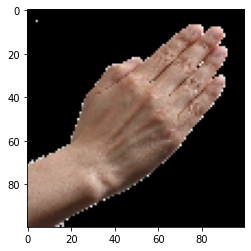

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')